In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

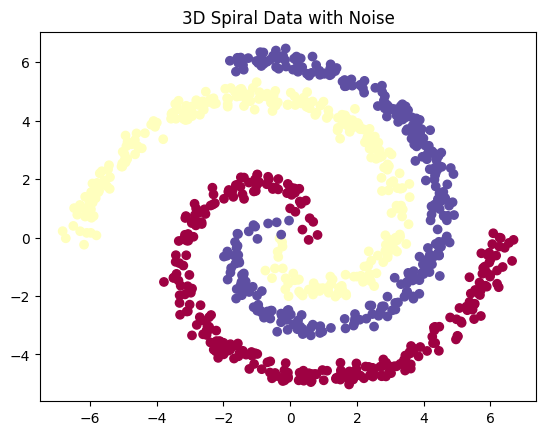

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_data(points, noise=0.5):
    n = points // 3  # Divide points equally among three spirals
    theta = np.sqrt(np.random.rand(n)) * 2 * np.pi  # Angle for spiral

    # Generate first spiral
    x1 = np.cos(theta) * theta
    y1 = np.sin(theta) * theta
    x1 += np.random.normal(scale=noise, size=n)
    y1 += np.random.normal(scale=noise, size=n)
    
    # Generate second spiral
    x2 = -np.cos(theta) * theta
    y2 = -np.sin(theta) * theta
    x2 += np.random.normal(scale=noise, size=n)
    y2 += np.random.normal(scale=noise, size=n)
    
    # Generate third spiral
    x3 = np.cos(theta + np.pi/1.7) * theta  # Offset the angle for the third spiral
    y3 = np.sin(theta + np.pi/1.7) * theta
    x3 += np.random.normal(scale=noise, size=n)
    y3 += np.random.normal(scale=noise, size=n)
    
    # Combine the points and create labels
    X = np.vstack((np.vstack((x1, y1)).T, 
                   np.vstack((x2, y2)).T,
                   np.vstack((x3, y3)).T))
    Y = np.hstack((np.zeros(n), np.ones(n), np.full(n, 2)))
    
    return X, Y

# Generate the data
points = 900  # Ensure the total number of points is divisible by 3
noise = 0.2
X, Y = generate_spiral_data(points, noise)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title("3D Spiral Data with Noise")
plt.show()


In [4]:
X

array([[-2.50186495, -3.33413503],
       [ 6.26516632, -0.30695253],
       [ 5.7263681 , -0.53753026],
       ...,
       [-0.89362033,  6.34464795],
       [ 2.2275555 ,  5.3639048 ],
       [ 1.94340154, -2.616695  ]])

In [5]:
Y = Y.astype(int)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [6]:
Y.shape[0]

900

In [7]:
class NN:
    def __init__(self,n_features,n_hidden, n_classes):
        self.d=n_features
        self.h=n_hidden
        self.n=n_classes
        self.W1=0.01*np.random.randn(self.d,self.h)
        self.b1=np.zeros((1,self.h))
        self.W2=0.01*np.random.randn(self.h,self.n)
        self.b2=np.zeros((1,self.n))
        
    def fwd_prop(self, X):
        Z1=np.dot(X,self.W1)+self.b1
        A1=np.maximum(0,Z1)
        Z2=np.dot(A1,self.W2)+self.b2
        Z2=np.exp(Z2)
        A2=Z2/np.sum(Z2,axis=1,keepdims=True)
        return A1,A2
    
    def c_loss(self, y, probs):
        num_examples = y.shape[0]
        correct_logprobs = -np.log(probs[range(num_examples), y])
        loss = np.sum(correct_logprobs) / num_examples
        return loss
    
    def back_prob(self,X,A1,A2,y):
        #compute the gradient on scores
        num_examples=y.shape[0]
        dZ2=A2
        dZ2[range(num_examples),y]-=1
        dZ2/=num_examples
        # first backprop into parameters W2 and b2
        dW2=np.dot(A1.T,dZ2)
        db2=np.sum(dZ2, axis=0,keepdims=True) 
        # first backprop into hidden layers, A1
        dA1=np.dot(dZ2, self.W2.T)
        # backprop the ReLU non-linearity
        dA1[A1<=0]=0
        # finally into w,b
        dZ1=dA1
        dW1=np.dot(X.T,dZ1)
        db1=np.sum(dZ1,axis=0,keepdims=True)
        return dW1,db1,dW2,db2
    
    def fit(self, X, lr, reg, max_iters):
        num_examples=X.shape[0]
        for i in range(max_iters):
            #foward prop
            A1,A2=self.fwd_prop(X)
            #calculate loss
            data_loss=self.c_loss(Y,A2)
            reg_loss=0.5*reg*np.sum(self.W1*self.W1)+0.5*reg*np.sum(self.W2*self.W2)
            loss = data_loss+reg_loss

            if i%1000==0:
                print("iteration %d: loss %f" % (i,loss))
            
            dW1,db1,dW2,db2=self.back_prob(X,A1,A2,Y)
            #add regr gradient distribution
            dW2+=reg*self.W2
            dW1+=reg*self.W1

            #perform a parameter update
            self.W1-=lr*dW1
            self.b1-=lr*db1
            self.W2-=lr*dW2
            self.b2-=lr*db2
        
    def predict(self, X):
        A1=np.maximum(0,np.dot(X,self.W1)+self.b1)
        Z2=np.dot(A1,self.W2)+self.b2
        y_hat=np.argmax(Z2,axis=1) #taking index of max probab
        return y_hat
        
nn_model=NN(n_features=2, n_hidden=100,n_classes=3)
nn_model.fit(X, lr=1, reg=1e-3, max_iters=10000)

iteration 0: loss 1.098800
iteration 1000: loss 0.165782
iteration 2000: loss 0.128115
iteration 3000: loss 0.108645
iteration 4000: loss 0.164406
iteration 5000: loss 0.152420
iteration 6000: loss 0.115578
iteration 7000: loss 0.196757
iteration 8000: loss 0.099332
iteration 9000: loss 0.095744


In [8]:
Z = nn_model.predict(X)
unique_values, counts = np.unique(Z, return_counts=True)

print("Unique values:", unique_values)
print("Counts:", counts)

Unique values: [0 1 2]
Counts: [300 301 299]


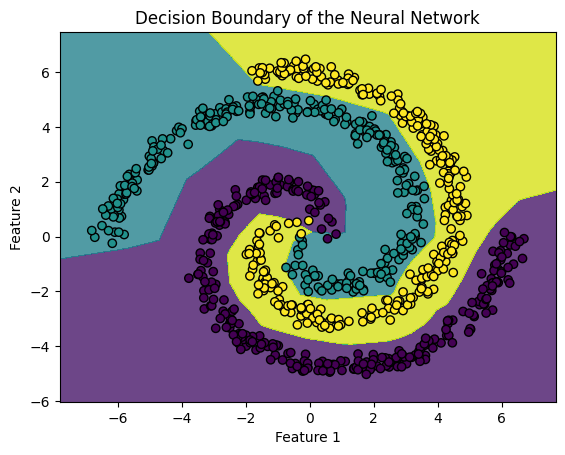

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid
h = 0.01  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the meshgrid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = nn_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the original data points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of the Neural Network')
plt.show()
